In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
%cd drive/MyDrive/RLWorms_Data/New_Lines/L437_all/L437_RandomLight/

[Errno 2] No such file or directory: 'drive/MyDrive/RLWorms_Data/New_Lines/L437_all/L437_RandomLight/'
/content/drive/MyDrive/RLWorms_Data/New_Lines/L437_all/L437_NoLight


In [3]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

In [28]:
fnames = []
for fname in os.listdir('./'):
    if '.pkl' in fname:
        print(fname)
        fnames.append(fname)

2023-02-17_14-51-16.pkl
2023-02-17_14-49-53.pkl
2023-02-17_15-05-24.pkl
2023-02-17_15-06-29.pkl
2023-02-17_15-16-57.pkl
2023-02-17_15-19-43.pkl
2023-02-17_15-28-52.pkl
2023-02-17_15-32-31.pkl
2023-02-17_15-40-42.pkl
2023-02-17_15-45-35.pkl


In [ ]:
with open(f'L446_Evals/{fnames[0]}','rb') as f:
    track = pickle.load(f)

In [ ]:
tdict = {
    'up1':   [1080,-50],
    'down1': [1080,-1850],
    'left1': [250,-960],
    'right1':[1980,-960],
    
    'up2':   [1080,-170],
    'down2': [1080,-1550],
    'left2': [360,-860],
    'right2':[1740,-860]
}

targets = [
    'up1',
    'down2',
    'left1',
    'right2',
    'down1',
    
    'up2',
    'up2',
    'up2',
    'right1',
    'right1',
    'right1',
]

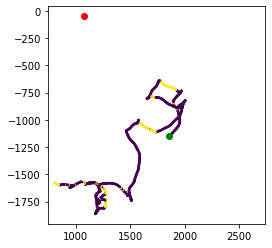

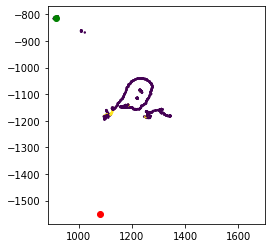

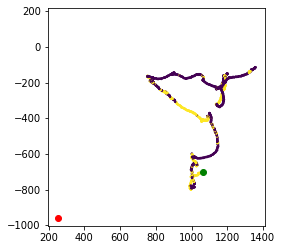

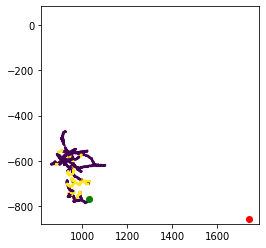

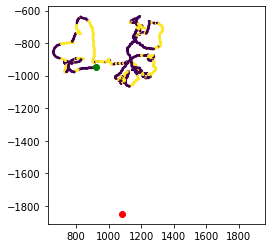

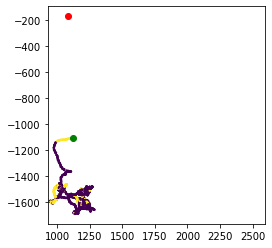

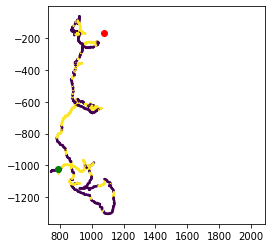

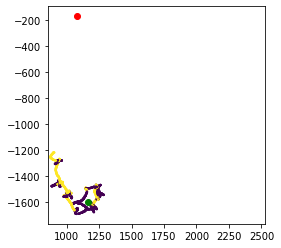

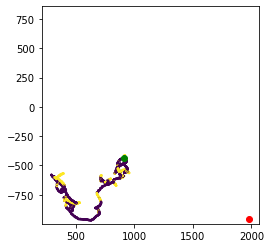

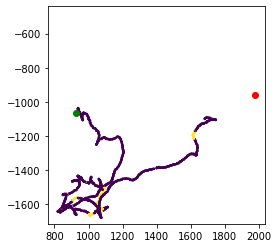

In [ ]:
for track_ind in range(10):
    plt.figure()
    with open(f'{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    plt.scatter(track['x'], track['y'],s=2,c=track['action'])
    plt.plot(*tdict[targets[track_ind]],'o',c='red')
    plt.plot(track['x'][0],track['y'][0],'o',c='green')
    plt.axis('square')
    plt.savefig(f'./track{track_ind}.svg')

In [ ]:
all_closests = []
for track_ind in range(10):
    with open(f'{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    closest = 1e6
    target = tdict[targets[track_ind]]
    for pt in range(len(track['x'])):
        dist = np.linalg.norm(np.array([track['x'][pt], track['y'][pt]]) - np.array(target))
        if dist < closest:
            closest = dist
    all_closests.append(closest)

In [ ]:
all_closests

[904.6104133824682,
 355.4068091638088,
 759.8058962656186,
 681.6480030044833,
 785.348330360484,
 938.1726919922579,
 68.24954212300622,
 1064.6482987353147,
 1098.8362025342994,
 274.6506872374435]

In [ ]:
closest_cm = np.array(all_closests)/540
closest_cm

array([1.67520447, 0.65816076, 1.40704796, 1.26231112, 1.45434876,
       1.73735684, 0.12638804, 1.97157092, 2.03488186, 0.50861238])

In [ ]:
print(np.mean(closest_cm), np.std(closest_cm))

1.2835883101479972 0.6142267552309426


In [ ]:
# Get light
all_closests = []
all_lights = 0
total_len = 0
for track_ind in range(10):
    with open(f'{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    all_lights += sum(track['action'])
    total_len += len(track['action'])

In [ ]:
all_lights /total_len # ALREADY CALCULATED FOR 437

array([0.2575])

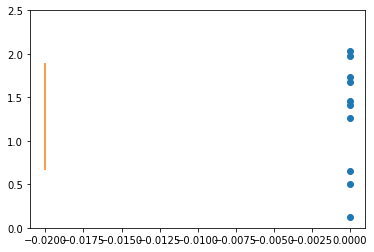

In [ ]:
plt.plot(np.zeros(10),[1.67520447, 0.65816076, 1.40704796, 1.26231112, 1.45434876,
       1.73735684, 0.12638804, 1.97157092, 2.03488186, 0.50861238],'o')
plt.errorbar(-.02,1.283588,yerr=0.614227)
plt.ylim([0,2.5])
plt.savefig('437Evals.svg')

# Controls: no light

In [29]:
with open(f'{fnames[0]}','rb') as f:
    track = pickle.load(f)

In [18]:
tdict = {
    'up1':   [1080,-50],
    'down1': [1080,-1850],
    'left1': [250,-960],
    'right1':[1980,-960],
    
    'up2':   [1080,-170],
    'down2': [1080,-1550],
    'left2': [360,-860],
    'right2':[1740,-860]
}

targets = [
    'left1',
    'right2',
    'up1',
    'down1',
    'up1',
    
    'left2',
    'up1',
    'left2',
    'right1',
    'right2'
]

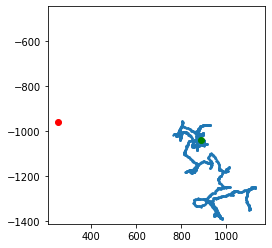

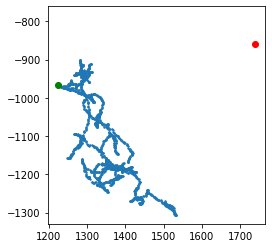

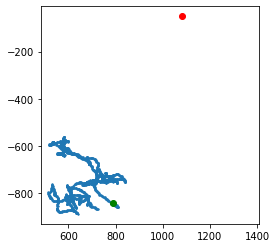

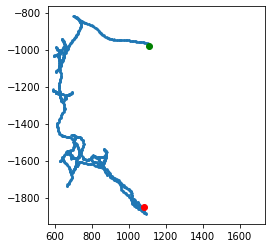

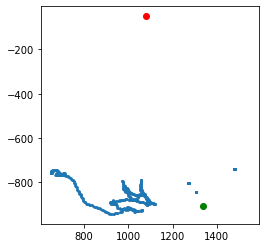

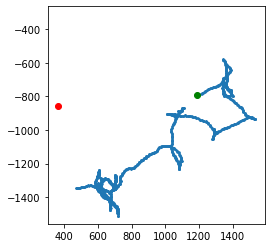

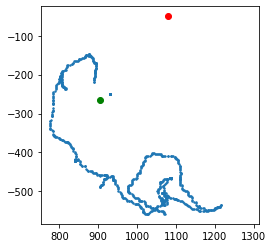

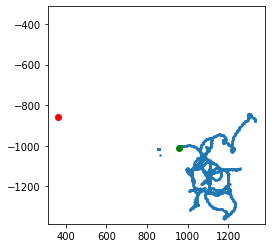

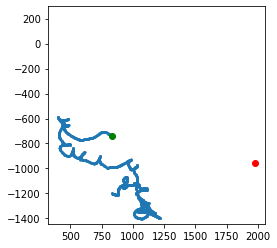

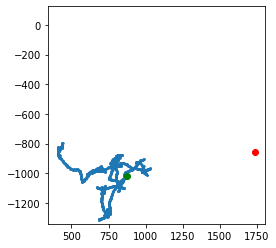

In [19]:
for track_ind in range(10):
    plt.figure()
    with open(f'{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    plt.scatter(track['x'], track['y'],s=2)#,c=track['action'])
    plt.plot(*tdict[targets[track_ind]],'o',c='red')
    plt.plot(track['x'][0],track['y'][0],'o',c='green')
    plt.axis('square')
    plt.savefig(f'./track{track_ind}.svg')

In [20]:
all_closests = []
for track_ind in range(10):
    with open(f'{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    closest = 1e6
    target = tdict[targets[track_ind]]
    for pt in range(len(track['x'])):
        dist = np.linalg.norm(np.array([track['x'][pt], track['y'][pt]]) - np.array(target))
        if dist < closest:
            closest = dist
    all_closests.append(closest)

In [21]:
all_closests

[518.1447674154396,
 425.32810864084684,
 708.6508308045649,
 7.615773105863909,
 739.3578294709538,
 453.5162621119556,
 222.03603311174518,
 519.0,
 879.41173519575,
 719.9951388724788]

In [22]:
closest_cm = np.array(all_closests)/540
closest_cm

array([0.95952735, 0.78764465, 1.31231635, 0.01410328, 1.36918117,
       0.83984493, 0.41117784, 0.96111111, 1.62854025, 1.33332433])

In [23]:
print(np.mean(closest_cm), np.std(closest_cm))

0.9616771256906663 0.4602082641475819


The U-value is 31. The critical value of U at p < .05 is 27. Therefore, the result is not significant at p < .05.

The z-score is 1.39847. The p-value is .08076. The result is not significant at p < .05.

THIS WAS IN THE WRONG DIRECTION FOR ONE-TAILED. P VALUE IS ACTUALLY .9192.

# Random light

In [30]:
tdict = {
    'up1':   [1080,-50],
    'down1': [1080,-1850],
    'left1': [250,-960],
    'right1':[1980,-960],
    
    'up2':   [1080,-170],
    'down2': [1080,-1550],
    'left2': [360,-860],
    'right2':[1740,-860]
}

targets = [
    'up1',
    'down1',
    'left1',
    'right1',
    'up1',
    
    'down1',
    'left1',
    'right1',
    'up1',
    'right1'
]

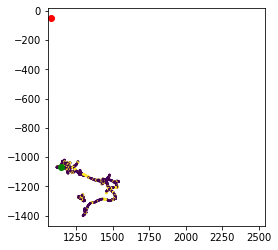

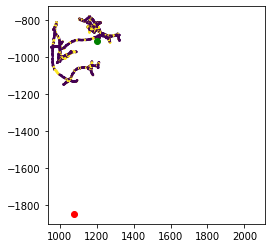

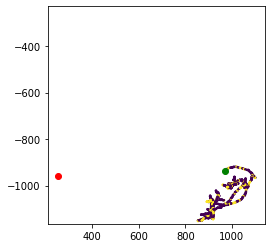

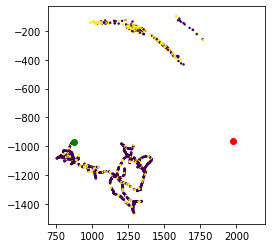

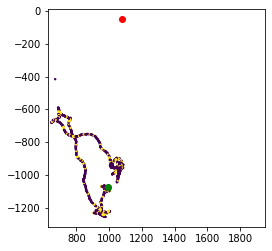

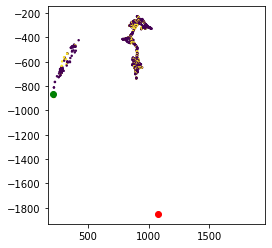

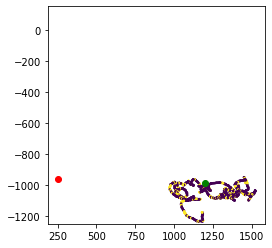

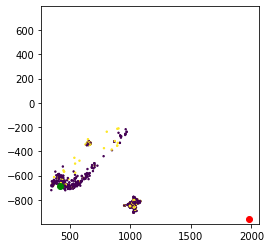

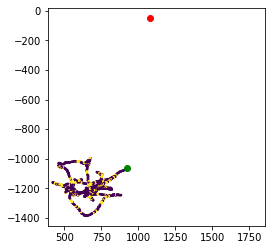

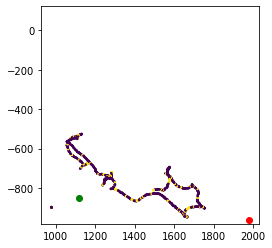

In [31]:
for track_ind in range(10):
    plt.figure()
    with open(f'{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    plt.scatter(track['x'], track['y'],s=2,c=track['action'])
    plt.plot(*tdict[targets[track_ind]],'o',c='red')
    plt.plot(track['x'][0],track['y'][0],'o',c='green')
    plt.axis('square')
    plt.savefig(f'track{track_ind}.svg')

In [32]:
all_closests = []
for track_ind in range(10):
    with open(f'{fnames[track_ind]}','rb') as f:
        track = pickle.load(f)
    closest = 1e6
    target = tdict[targets[track_ind]]
    for pt in range(len(track['x'])):
        if track_ind==0:
            if track['y'][pt] > -750:
                continue
        dist = np.linalg.norm(np.array([track['x'][pt], track['y'][pt]]) - np.array(target))
        if dist < closest:
            closest = dist
    all_closests.append(closest)

In [33]:
all_closests

[973.1705914175582,
 702.3987471515022,
 633.7822970074188,
 581.7121281183674,
 548.8506171992522,
 1130.422929703746,
 724.016574395918,
 909.1276038048784,
 1027.7553210759845,
 233.0772404161333]

In [34]:
closest_cm = np.array(all_closests)/540
closest_cm

array([1.80216776, 1.30073842, 1.17367092, 1.07724468, 1.01639003,
       2.0933758 , 1.34077143, 1.68356964, 1.90325059, 0.43162452])

In [35]:
print(np.mean(closest_cm), np.std(closest_cm))

1.3822803796834737 0.47187989620392323


The U-value is 49. The critical value of U at p < .05 is 27. Therefore, the result is not significant at p < .05.

The z-score is -0.0378. The p-value is .48405. The result is not significant at p < .05.

# Stats

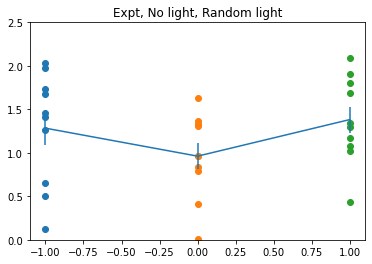

In [41]:
expt = np.array([1.67520447, 0.65816076, 1.40704796, 1.26231112, 1.45434876,
       1.73735684, 0.12638804, 1.97157092, 2.03488186, 0.50861238])
nolight = np.array([0.95952735, 0.78764465, 1.31231635, 0.01410328, 1.36918117,
       0.83984493, 0.41117784, 0.96111111, 1.62854025, 1.33332433])
randomlight = np.array([1.80216776, 1.30073842, 1.17367092, 1.07724468, 1.01639003,
       2.0933758 , 1.34077143, 1.68356964, 1.90325059, 0.43162452])

plt.scatter(np.zeros(10)-1, expt) # expt
plt.scatter(np.zeros(10), nolight) # no light
plt.scatter(np.zeros(10)+1, randomlight) # random light

plt.errorbar([-1,0,1],[np.mean(expt), np.mean(nolight), np.mean(randomlight)], yerr=[np.std(expt)/np.sqrt(10), np.std(nolight)/np.sqrt(10), np.std(randomlight)/np.sqrt(10)])
plt.ylim([0,2.5])
plt.title('Expt, No light, Random light')
plt.savefig('437_stats.svg')

The U-value is 26. The critical value of U at p < .05 is 23. Therefore, the result is not significant at p < .05.

The z-score is -1.77643. The p-value is .07508. The result is not significant at p < .05.

BETWEEN CONTROLS